In [2]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ----- ------------------------------- 41.0/293.3 kB 991.0 kB/s eta 0:00:01
     --------------- ---------------------- 122.9/293.3 kB 1.4 MB/s eta 0:00:01
     --------------------------------- ---- 256.0/293.3 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.8 MB/s eta 0:00:00


In [3]:
house_data=pd.read_csv('Delhi_v2.csv')

In [4]:
house_data.head(6)

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593
5,5,3700000.0,"tower 2, 6th floor, Crossings Republik, Ghazia...",1150.0,28.628040,77.437809,2.0,2.0,3.0,Ready to Move,New Property,NaN,NaN,NaN,NaN,Flat,\n,3217.391304


In [5]:
house_data.shape

(7738, 18)

In [6]:
house_data.columns


Index(['Unnamed: 0', 'price', 'Address', 'area', 'latitude', 'longitude',
       'Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [10]:
house_data['area'].value_counts()

area
900.0     325
1000.0    264
1100.0    205
1200.0    156
800.0     137
         ... 
1067.0      1
1638.0      1
1531.0      1
4690.0      1
1898.0      1
Name: count, Length: 1102, dtype: int64

In [12]:
house_data['Landmarks'].value_counts()

Landmarks
metro station                                    8
NH 8 and Dwarka Expressway                       6
Shipra Mall                                      6
DPS School                                       6
abes engineering college                         5
                                                ..
Next to sector 78 metro station                  1
Main Market is just 100 mtr walking distance.    1
telephone exchange sector 12, gurgaon            1
Nearby Sanjay Park                               1
vvip mall                                        1
Name: count, Length: 2612, dtype: int64

In [13]:
house_data.duplicated().sum()

0

In [14]:

house_data.describe()

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,7738.000000,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,5166.000000,2612.000000,1733.000000,7738.000000
mean,3868.500000,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.426442,7.673047,1.829198,5543.660241
std,2233.912524,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,1.083677,60.417508,1.192607,2408.659307
min,0.000000,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,1.000000,0.000000,2100.000000
25%,1934.250000,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,1.000000,1.000000,3950.986915
50%,3868.500000,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,1.000000,2.000000,4972.674332
75%,5802.750000,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,2.000000,2.000000,6350.638693
max,7737.000000,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,1406.000000,10.000000,44378.698225


In [15]:
house_data.isnull()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,False,False,False
7734,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False
7735,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False
7736,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [16]:
house_data.isnull().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [17]:
house_data=house_data.fillna(method='bfill')

In [18]:
house_data.isnull().sum()

Unnamed: 0          0
price               0
Address             0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
parking             1
Furnished_status    3
Lift                1
Landmarks           1
type_of_building    0
desc                0
Price_sqft          0
dtype: int64

In [19]:
house_data.shape

(7738, 18)

In [22]:
house_data['Price_per_sqft']=house_data['price']/house_data['area']

In [25]:
import seaborn as sns


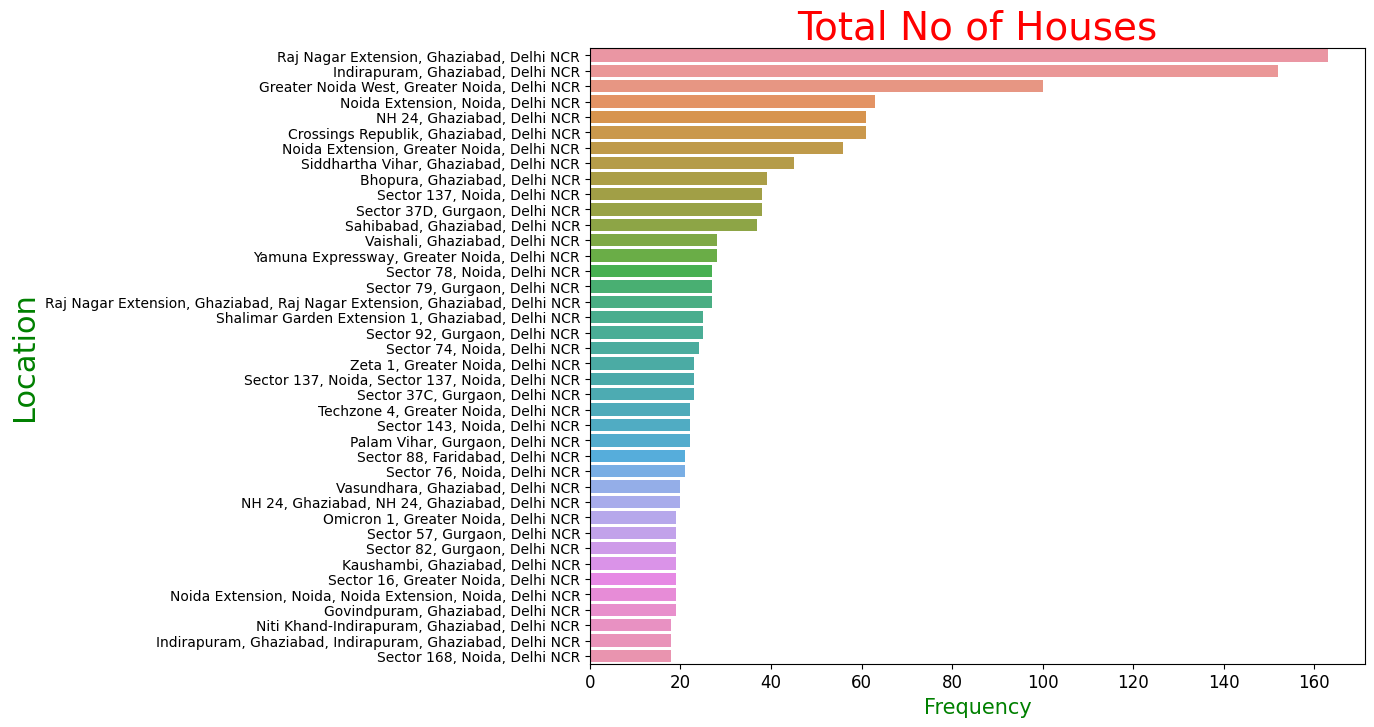

In [26]:
plt.figure(figsize=(10,8))
most_cat=house_data['Address'].value_counts()[:40]
sns.barplot(x=most_cat,y=most_cat.index,data=house_data)
plt.xticks(size=12)
plt.xlabel("Frequency",size=15,c="g")
plt.ylabel("Location",size=22,c="g")
plt.title("Total No of Houses",size=28,c="r")
plt.show()

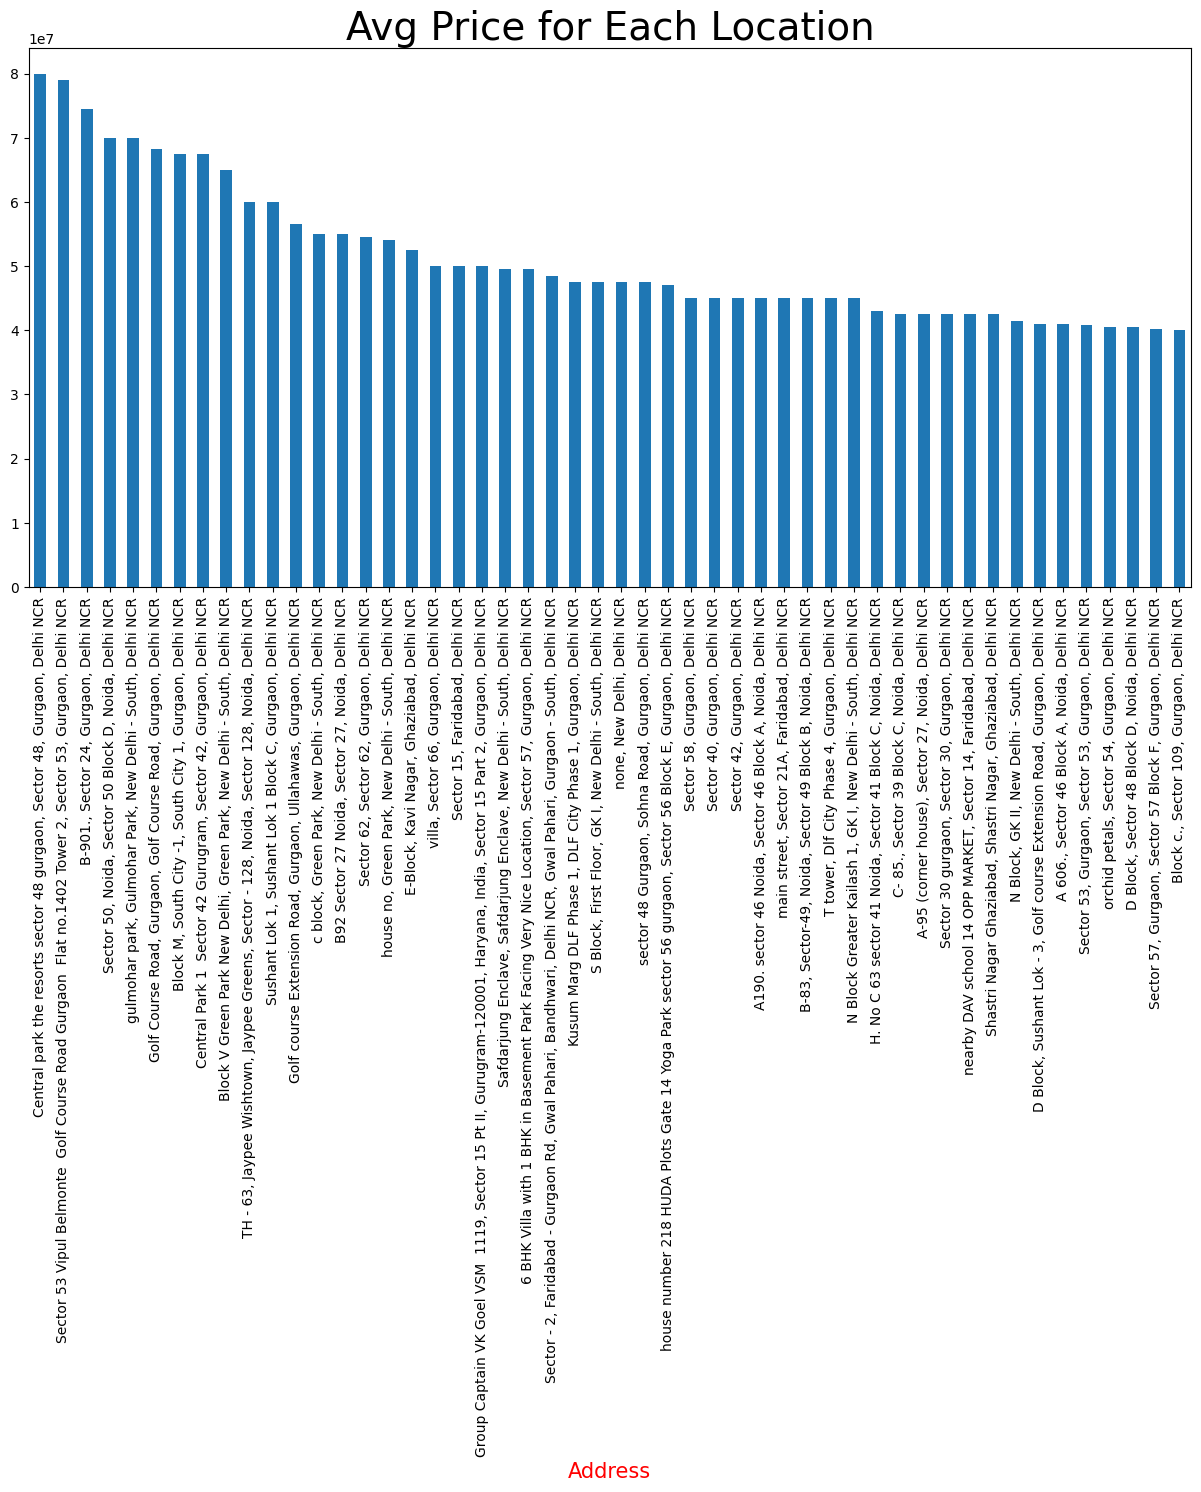

In [32]:
plt.figure(figsize=(15, 7))
house_data.groupby("Address")['price'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.xlabel("Address", size=15, c="r")
plt.title("Avg Price for Each Location", size=28, c="k")
plt.show()